In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
from pykalman import KalmanFilter

In [2]:
def ReadFile() :
#     filename = sys.argv[1]
    filename = 'sysinfo.csv'
    cpu_data = pd.read_csv(filename, parse_dates=['timestamp'])
    return cpu_data

In [3]:
def RunLowessFilter(cpu_data) :
    filtered = lowess(cpu_data['temperature'], cpu_data['timestamp'], frac=0.05)
    return filtered

In [4]:
def RunKalmanFilter(cpu_data) :
    kalman_data = cpu_data[['temperature', 'cpu_percent']]
    # iloc gets the specified row of data
    initial_state = kalman_data.iloc[0]
    observation_stddev = 0.9
    transition_stddev = 0.3
    observation_covariance = [[observation_stddev ** 2, 0], [0, 2 ** 2]]
    transition_covariance = [[transition_stddev ** 2, 0], [0, 10 ** 2]]
    transition_matrix = [[1, 0.125], [0, 1]]
    kf = KalmanFilter(
        initial_state_mean=initial_state,
        initial_state_covariance=observation_covariance,
        observation_covariance=observation_covariance,
        transition_covariance=transition_covariance,
        transition_matrices=transition_matrix
    )
    kalman_smoothed, _ = kf.smooth(kalman_data)
    return kalman_smoothed

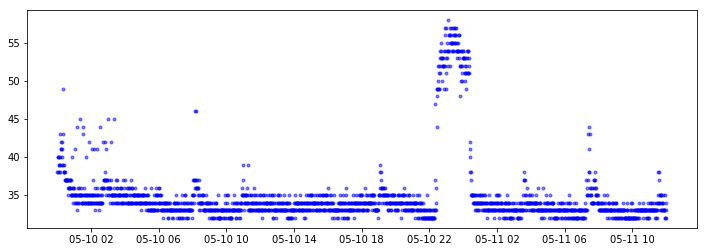

In [5]:
cpu_data = ReadFile()
plt.figure(figsize=(12, 4))
plt.plot(cpu_data['timestamp'], cpu_data['temperature'], 'b.', alpha=0.5)
plt.show() # easier for testing

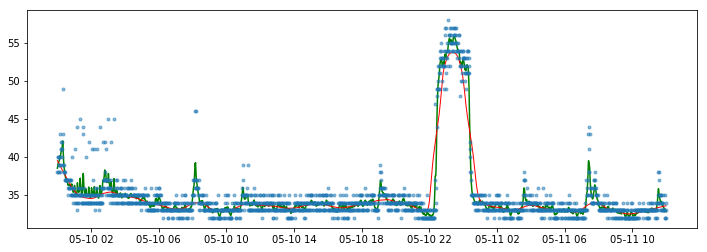

In [6]:

lowess_smoothed = RunLowessFilter(cpu_data)
kalman_smoothed = RunKalmanFilter(cpu_data)
plt.figure(figsize=(12, 4))
plt.plot(cpu_data['timestamp'], kalman_smoothed[:, 0], 'g-')
plt.plot(cpu_data['timestamp'], lowess_smoothed[:, 1], 'r-', linewidth=1)
plt.plot(cpu_data['timestamp'], cpu_data['temperature'], '.', alpha=0.5)
plt.savefig('cpu.svg') # for final submission

In [7]:
kalman_smoothed

array([[ 3.85431501e+01,  4.31315776e-01],
       [ 3.87177645e+01,  1.13821374e+00],
       [ 3.90604929e+01,  5.94950805e-01],
       ...,
       [ 3.29216684e+01,  1.29221149e-01],
       [ 3.29624550e+01, -4.47732918e-01],
       [ 3.28158395e+01, -2.89357377e-03]])

In [8]:
kalman_smoothed[:, 0]

array([38.54315006, 38.71776455, 39.0604929 , ..., 32.92166841,
       32.96245499, 32.81583954])